In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import beta, gamma, lognorm, norm
import warnings

warnings.filterwarnings("ignore", message="divide by zero encountered in log")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

In [154]:
df = pd.read_csv('Old_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001666 entries, 0 to 2001665
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state           object 
 6   zip_code        float64
 7   house_size      float64
 8   prev_sold_date  object 
 9   price           float64
dtypes: float64(6), object(4)
memory usage: 152.7+ MB


In [156]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent.round(3))

status             0.000
bed               16.914
bath              17.122
acre_lot          20.921
city               0.015
state              0.000
zip_code           0.026
house_size        32.233
prev_sold_date    49.691
price              0.014
dtype: float64


In [157]:
df.dropna(subset=["price"], axis = 0, inplace=True)
df.drop(df[df["price"] <= 1000].index, axis = 0, inplace=True)

n_bins = 50
quantiles = df['price'].quantile(np.linspace(0, 1, n_bins + 1)[1:])
min_price = df['price'].min() 

bins = quantiles.tolist()
bins.insert(0, min_price)

price_categories = pd.cut(df['price'], bins=bins, include_lowest=True)
df['price_category'] = price_categories

price_category_bed_means = df.groupby('price_category')['bed'].mean().astype(int)
price_category_bath_means = df.groupby('price_category')['bath'].mean().astype(int)


C:\Users\nkasa\AppData\Local\Temp\ipykernel_22392\2262356570.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_bed_means = df.groupby('price_category')['bed'].mean().astype(int)
C:\Users\nkasa\AppData\Local\Temp\ipykernel_22392\2262356570.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_bath_means = df.groupby('price_category')['bath'].mean().astype(int)


In [159]:
def fill_bed(row):
    category = row['price_category']
    if pd.isna(row['bed']):
      return price_category_bed_means.loc[category]
    else:
      return row['bed']

df["bed"] = df.apply(fill_bed, axis=1)

def fill_bath(row):
    category = row['price_category']
    if pd.isna(row['bath']):
      return price_category_bath_means.loc[category]
    else:
      return row['bath']
    
df["bath"] = df.apply(fill_bath, axis=1)

df.drop(["price_category"], axis=1, inplace=True)

In [ ]:
# numeric_df = df.select_dtypes(include=['int64', 'float64'])
# numeric_df_copy = numeric_df.copy()
# # numeric_df_copy['combined'] = numeric_df_copy[['bed', 'bath', 'price']].astype(str).sum(axis=1)
# # mean_size_by_group = numeric_df_copy.groupby('combined')['house_size'].mean()

# numeric_df_copy.drop(["zip_code"], axis=1, inplace=True)

# Imputer = KNNImputer(n_neighbors=3)
# df_filled = Imputer.fit_transform(numeric_df_copy)
# df_filled = pd.DataFrame(df_filled, columns = numeric_df_copy.columns)


## Null Percentage:

In [160]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent.round(3))

status             0.000
bed                0.000
bath               0.000
acre_lot          20.902
city               0.012
state              0.000
zip_code           0.024
house_size        32.215
prev_sold_date    49.679
price              0.000
dtype: float64


In [236]:
rows_with_null = numeric_df_copy[numeric_df_copy['house_size'].isnull()]
print(rows_with_null)

         bed  bath  acre_lot  zip_code  house_size      price  \
82       3.0   1.0      0.25     602.0         NaN    94770.0   
96       2.0   1.0      0.13     603.0         NaN    31179.0   
106      2.0   1.0      0.18     603.0         NaN    44720.0   
110      2.0   1.0      0.22     603.0         NaN    37359.0   
113      2.0   1.0      0.33     603.0         NaN    56406.0   
...      ...   ...       ...       ...         ...        ...   
2000218  3.0   2.0      2.50   19440.0         NaN   316000.0   
2000639  3.0   2.0      1.97   19002.0         NaN   755000.0   
2000978  3.0   3.0      0.01   19125.0         NaN   491500.0   
2001226  5.0   5.0       NaN   19044.0         NaN  1189750.0   
2001404  3.0   3.0       NaN   19128.0         NaN   651100.0   

                  combined  
82         3.0-1.0-94770.0  
96         2.0-1.0-31179.0  
106        2.0-1.0-44720.0  
110        2.0-1.0-37359.0  
113        2.0-1.0-56406.0  
...                    ...  
2000218   3.0-2.

## Correlation:

In [ ]:
for i in df.columns[:9] :
    if df[i].dtype != "object":
        print("Correlation between",i, "and the label \"price\": ", round(df[i].corr(df["price"])*100,2))

There are no high correlations between the features and the label, so none will be redundant features. It is important to note that there exists a high correlation between the city,state and the zipcode as the city and the state are could be determined through the zip code.

## Fixing Data Types

In [ ]:
df["bed"] = df["bed"].convert_dtypes(int)
df["bath"] = df["bath"].convert_dtypes(int)
df["zip_code"] = df["zip_code"].convert_dtypes(int)

df['zip_code'] = df['zip_code'].astype(str).fillna('')
df['zip_code'] = df['zip_code'].apply(lambda x: x.zfill(5))  

df.head()

## Zip_Code
Preparing the Zip_code by shortening it to two digits since we don't need the first three digits as they indicate the state and city which are already present in the dataset. We will also set the null values to 100

In [ ]:
df['zip_code'] = df['zip_code'].str[3:]
df['zip_code'] = df['zip_code'].replace("A>", "100")
df.head()

## Prev_Sold_Date
Changing the prev_sold_date into a boolean sold feature indicating whether the house was sold or not


In [ ]:
df['sold'] = df['prev_sold_date'].notnull().map({True: 'yes', False: 'no'})
df.drop(["prev_sold_date"], axis=1, inplace=True)
df.head()

## Handling the NULLs
We will handle the Nulls in the numerical features by setting them to the mean value. However, we will drop the rows with null price as each row needs a label

In [178]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df_copy = numeric_df.copy()
numeric_df_copy['price'] = df['price']
numeric_df_copy['combined'] = numeric_df_copy[['bed', 'bath' ,'price']].astype(str).sum(axis=1)
numeric_df_copy.head()

,bed,bath,acre_lot,zip_code,house_size,price,combined
0,3.0,2.0,0.12,601.0,920.0,105000.0,3.02.0105000.0
1,4.0,2.0,0.08,601.0,1527.0,80000.0,4.02.080000.0
2,2.0,1.0,0.15,795.0,748.0,67000.0,2.01.067000.0
3,4.0,2.0,0.10,731.0,1800.0,145000.0,4.02.0145000.0
4,6.0,2.0,0.05,680.0,NaN,65000.0,6.02.065000.0


In [179]:
mean_size_by_group = numeric_df_copy.groupby('combined')['house_size'].mean()
print(mean_size_by_group)
print(mean_size_by_group.isnull().sum() *100/ len(mean_size_by_group))


combined
1.01.010000.0           728.472727
1.01.0100000.0          653.732394
1.01.01000000.0         733.375000
1.01.01001696.0         696.000000
1.01.01006975.0         625.000000
                          ...     
9.09.0875000.0         6232.000000
9.09.09450000.0        7738.000000
9.09.0950000.0         4982.000000
9.09.0999000.0         5986.000000
99.0198.05300000.0    14462.000000
Name: house_size, Length: 40609, dtype: float64
13.309857420768795


In [183]:
def impute_size(row):
  if pd.isna(row['house_size']):
    group = row['combined']
    return mean_size_by_group[group]
  else:
    return row['house_size']

# Apply imputation function to all rows
numeric_df_copy['house_size'] = numeric_df_copy.apply(impute_size, axis=1)
print(numeric_df_copy['house_size'].isnull().sum() *100/ len(numeric_df_copy['house_size']))

1.0317554739526733


In [181]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df_copy = numeric_df.copy()
numeric_df_copy['price'] = df['price']
numeric_df_copy['combined'] = numeric_df_copy[['bed', 'bath' ,'price']].astype(str).sum(axis=1)
numeric_df_copy.head()
mean_size_by_group = numeric_df_copy.groupby('combined')['acre_lot'].mean()
print(mean_size_by_group)
print(mean_size_by_group.isnull().sum() *100/ len(mean_size_by_group))
def impute_size(row):
  if pd.isna(row['acre_lot']):
    group = row['combined']
    return mean_size_by_group[group]
  else:
    return row['acre_lot']

# Apply imputation function to all rows
numeric_df_copy['acre_lot'] = numeric_df_copy.apply(impute_size, axis=1)
print(numeric_df_copy['acre_lot'].isnull().sum() *100/ len(numeric_df_copy['acre_lot']))


combined
1.01.010000.0         4.206111
1.01.0100000.0        0.333243
1.01.01000000.0       0.941000
1.01.01001696.0            NaN
1.01.01006975.0            NaN
                        ...   
9.09.0875000.0        1.100000
9.09.09450000.0       1.370000
9.09.0950000.0        0.450000
9.09.0999000.0        0.120000
99.0198.05300000.0    0.290000
Name: acre_lot, Length: 40609, dtype: float64
22.593513753108915
5.608420804269388


In [184]:
print(numeric_df_copy.isna().sum()*100 / numeric_df_copy.shape[0])

bed           0.000000
bath          0.000000
acre_lot      5.608421
zip_code      0.024144
house_size    1.031755
price         0.000000
combined      0.000000
dtype: float64


In [187]:
numeric_df_copy["acre_lot"].fillna(numeric_df_copy["acre_lot"].mean(), inplace=True)
numeric_df_copy["house_size"].fillna(numeric_df_copy["house_size"].mean(), inplace=True)
print(numeric_df_copy.isna().sum()*100 / numeric_df_copy.shape[0])

bed           0.000000
bath          0.000000
acre_lot      0.000000
zip_code      0.024144
house_size    0.000000
price         0.000000
combined      0.000000
dtype: float64


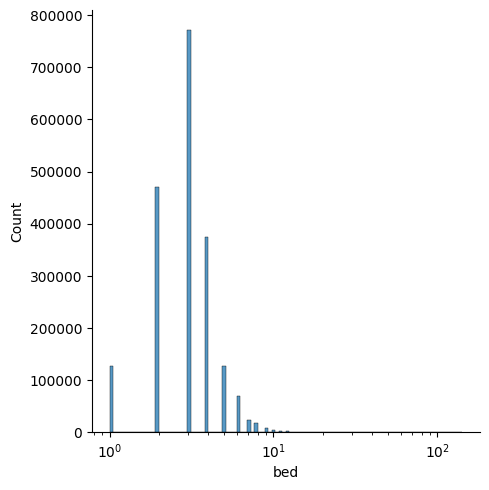

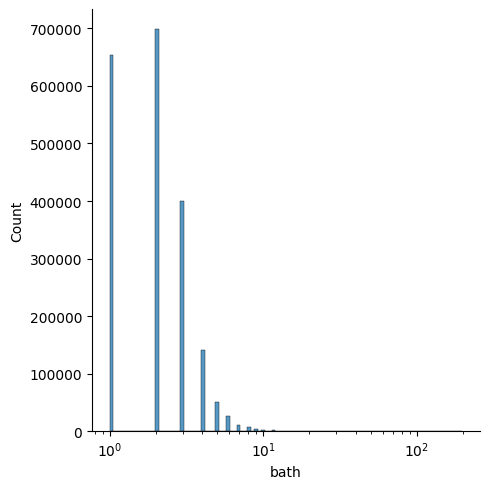

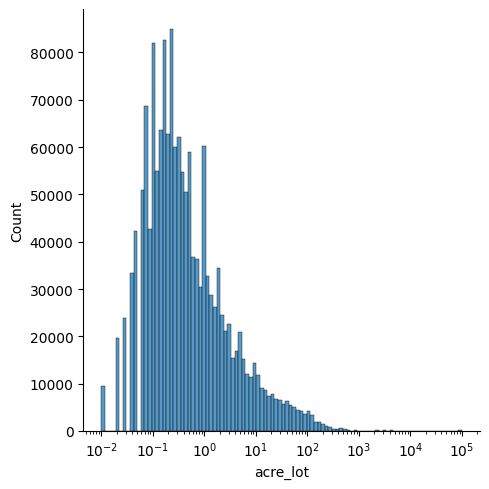

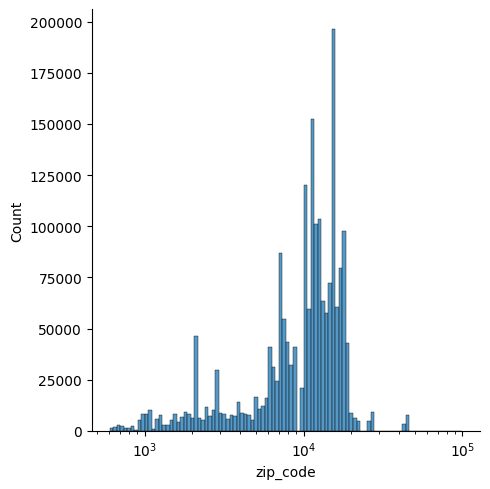

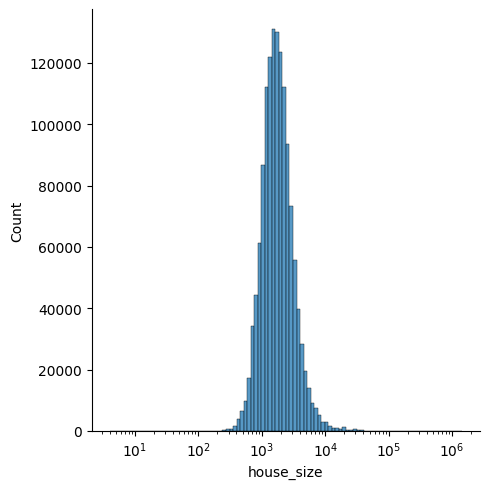

In [190]:


for i in numeric_df_copy:
  sns.displot(data=numeric_df, x=i, bins=100, log_scale=True)

In [201]:
numeric_df_copy.head()
print(numeric_df_copy.isna().sum())

bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64


In [202]:
from fitter import Fitter , get_common_distributions

def get_best_distribution():
    numeric_columns = ['bed', 'bath',"acre_lot",  'house_size']

    columns_distributions_dict = {column: "" for column in numeric_columns}

    for column in numeric_columns:
        print("###### " + column + " ######")

        data = numeric_df_copy[column].values

        f = Fitter(data,distributions=["beta", "gamma", "lognorm", "norm", "uniform"])
        f.fit()
        f.summary(plot=False)
        dist = f.get_best(method="sumsquare_error")
        best_dist = ""
        for key in dist.keys():
            best_dist = key

        columns_distributions_dict[column] = str(best_dist)
        print(column)
        print(f"Best Distribution: {best_dist}")
        print()

    return columns_distributions_dict

get_best_distribution()

###### bed ######


2024-03-11 03:28:40.188 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.146776)
2024-03-11 03:28:40.237 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.007771)
2024-03-11 03:28:49.111 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.003227)
2024-03-11 03:29:09.749 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-11 03:29:09.752 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)


bed
Best Distribution: lognorm

###### bath ######


2024-03-11 03:29:10.344 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.010723)
2024-03-11 03:29:10.356 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.134604)
2024-03-11 03:29:26.953 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.122806)
2024-03-11 03:29:39.852 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-11 03:29:39.855 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)


bath
Best Distribution: norm

###### acre_lot ######


2024-03-11 03:29:40.638 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-11 03:29:40.686 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1e-06)
2024-03-11 03:30:09.986 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)
2024-03-11 03:30:09.989 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-11 03:30:09.989 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)


acre_lot
Best Distribution: norm

###### house_size ######


2024-03-11 03:30:11.082 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-11 03:30:11.104 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-03-11 03:30:40.216 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-03-11 03:30:40.222 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gamma distribution (taking more than 30 seconds)
2024-03-11 03:30:40.276 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED lognorm distribution (taking more than 30 seconds)


house_size
Best Distribution: norm



{'bed': 'lognorm', 'bath': 'norm', 'acre_lot': 'norm', 'house_size': 'norm'}

## Outliers
Scatter Plots

In [ ]:
numeric_df.drop(["price"], axis=1, inplace=True)

for i in numeric_df.columns:
    plt.scatter(numeric_df[i], df["price"], s = 20)
    plt.title(i)
    plt.show()

Box Plots

In [ ]:
for column in numeric_df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=numeric_df[column], log_scale=True, orient='h')
    plt.title(f'Box plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

Interquartile range

In [ ]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outlier = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
print(IQR)
print()
print("- Outlier lower bound:")
print(Q1- 1.5 * IQR)
print()
print("- Outlier upper bound:")
print(Q3 + 1.5 * IQR)

print()
print("- Number of outliers:")
for i in numeric_df.columns:
    print(i, ":", outlier[i].sum())
print()
print("- Percentage of outliers:")
for i in numeric_df.columns:
    print(i, ":", (outlier[i].sum()*100/len(outlier[i])))

## Distribution

In [ ]:
print("- Statistical Overview")
print(numeric_df.describe())
print()
print("- Mean")
print(numeric_df.mean())
print()
print("- Median")
print(numeric_df.median())
print()
print("- Mode")
print(numeric_df.mode())
print()
print("- Standard Deviation")
print(numeric_df.std())
print()
print("- Skewness")
print(numeric_df.skew())

for i in numeric_df.columns:
  sns.displot(data=numeric_df, x=i, bins=100, log_scale=True)

Histograms

In [ ]:
for i in numeric_df.columns:

    mean = numeric_df[i].mean()
    std = numeric_df[i].std()

    b = ( (mean * (1-mean)**2)/(std**2) ) - mean - 1
    a = (mean * b) / (1 - mean)
    k = mean**2 / (std**2)

    plt.figure(figsize=(10, 6))  
    plt.title(f'Histogram of {i}')  
    plt.xlabel('Value')  
    plt.ylabel('Density')  

    if (i == "house_size"):
        plt.hist(data= numeric_df, x=i, bins=6000, density=True, color= "blue" ,alpha=0.7, edgecolor='black') 
        # plt.xlim(0,15000)
        x = np.linspace(0, 15000, 1000)

    elif (i == "acre_lot"):
        plt.hist(data= numeric_df, x=i, bins=60000, density=True, color= "blue" ,alpha=0.7, edgecolor='black') 
        plt.xlim(0,50)
        plt.ylim(0,1)
        x = np.linspace(0,50,60)
    else:
        plt.hist(data= numeric_df, x=i, bins=500, density=True, color= "blue" ,alpha=0.7, edgecolor='black') 
        plt.xlim(0,20)
        x = np.linspace(0,100, 300)

    b_x = np.linspace(0,1,100)

    pdf_norm = norm.pdf(x, np.mean(numeric_df[i]), np.std(numeric_df[i]))
    plt.plot(x, pdf_norm, label='Normal', color='red')

    pdf_beta = beta.pdf(x, abs(a),abs(b))  
    plt.plot(x, pdf_beta, label='Beta', color='green', alpha=0.6)

    pdf_gamma = gamma.pdf(x, k)  
    plt.plot(x, pdf_gamma, label='Gamma', color='purple')

    pdf_lognorm = lognorm.pdf(x, 1, loc=0, scale=np.exp(np.mean(np.log(numeric_df[i]))))
    plt.plot(x, pdf_lognorm, label='Lognormal', color='orange')
    plt.legend()
    plt.show()

## Scaling

In [ ]:
scaler = StandardScaler()
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

df["bed"] = numeric_df['bed']
df["bath"] = numeric_df['bath']
df["house_size"] = numeric_df['house_size']
df["acre_lot"] = numeric_df['acre_lot']

df.head()

## One-Hot Encoding

In [ ]:
print("Num of status: ",len(df["status"].unique()))
print("Num of cities: ",len(df["city"].unique()))
print("Num of states: ",len(df["state"].unique()))
print("Num of zipcodes: ",len(df["zip_code"].unique()))
print("Num of sold: ",len(df["sold"].unique()))

In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
cols = ["city", "state", "zip_code", "status", "sold"]
NewDF = OHE.fit_transform(df[cols])
print(NewDF)

## Finalizing the Dataframe

In [ ]:
NewDF['bed'] = df['bed']
NewDF['bath'] = df['bath']
NewDF['acre_lot'] = df['acre_lot']
NewDF['house_size'] = df['house_size']
NewDF['price'] = df['price']

NewDF.info()